# Analysis of the scooter rental service

For a data analysis project for scooter rental service GoFast, you can consider the following steps:

1. Data preparation: checking for gaps, duplicates

2. Exploratory data analysis: frequency of occurrence of cities, ratio of users with and without subscription, age of users, etc.

3. Visualization of results: constructing graphs and diagrams to visualize the results of the analysis.


4. Testing hypotheses:
  * Subscribed users spend more time traveling
  * The distance traveled by users with a subscription in one trip does not exceed 3130 meters
  * Whether the monthly revenue from users with a monthly subscription will be higher than the revenue from users without a subscription.

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

# Open the data file and review the general information.

In [2]:
try:
    users_data = pd.read_csv('/datasets/users_go.csv')
    ride_data = pd.read_csv('/datasets/rides_go.csv')
    sub_data = pd.read_csv('/datasets/subscriptions_go.csv')
except FileNotFoundError:
    users_data = pd.read_csv(r'C:\Users\ASUS\Desktop\Практикум\Data\GoFast\users_go.csv')
    ride_data = pd.read_csv(r'C:\Users\ASUS\Desktop\Практикум\Data\GoFast\rides_go.csv')
    sub_data = pd.read_csv(r'C:\Users\ASUS\Desktop\Практикум\Data\GoFast\subscriptions_go.csv')

In [3]:
users_data.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
ride_data.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
sub_data.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
sub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


# Data preprocessing 

In [9]:
# Casting the ride_data['date'] column to a Pandas date type
ride_data['date'] = pd.to_datetime(ride_data['date'], format='%Y-%m-%d')

In [10]:
# Create a column with month numbers
ride_data['month'] = ride_data['date'].dt.month

In [11]:
users_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [12]:
ride_data.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [13]:
sub_data.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

There are no missing values in dataframes

In [14]:
users_data = users_data.drop_duplicates()

In [15]:
# Код ревьюера
users_data.duplicated().sum()

0

In [16]:
# Код ревьюера
ride_data.duplicated().sum()

0

# Exploratory Data Analysis

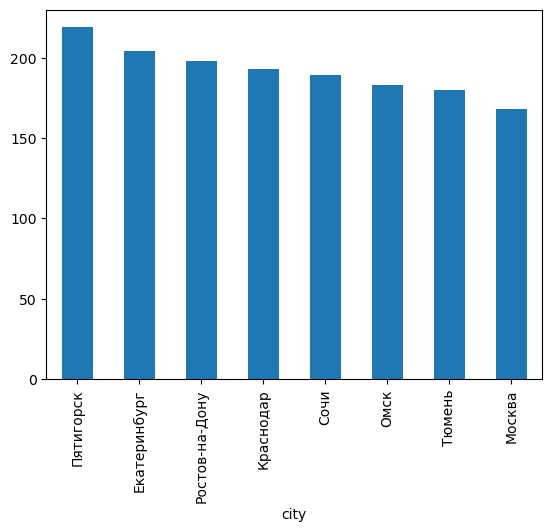

In [17]:
users_data.groupby('city')['city'].count().sort_values(ascending = False).plot(kind='bar');

The most users are in Pyatigorsk, the least in Moscow

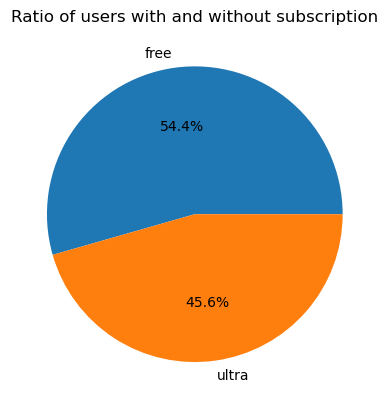

In [18]:
(
    users_data.groupby('subscription_type')['subscription_type']
    .count()
    .plot(kind = 'pie',autopct='%1.1f%%',ylabel='',title='Ratio of users with and without subscription')
    
);

There are 8.8% fewer users with a subscription than users without a subscription

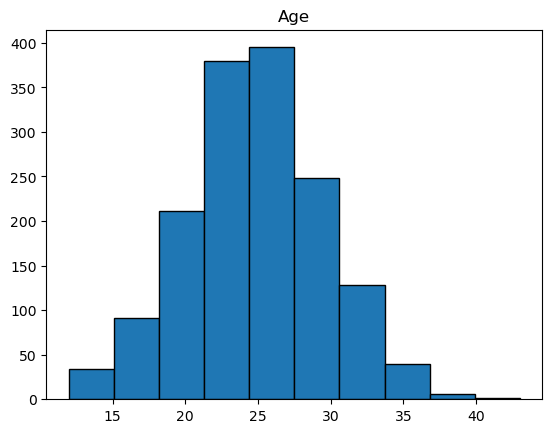

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [19]:
users_data['age'].hist(edgecolor="black",grid = False);
plt.title('Age')
plt.show()
users_data['age'].describe()

The average user age is from 22 to 28 years old

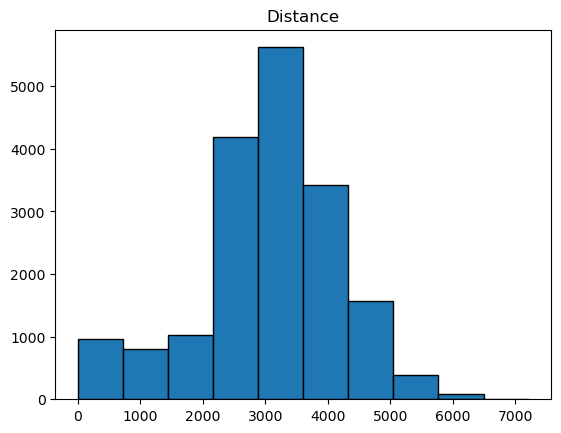

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [20]:
ride_data['distance'].hist(edgecolor="black",grid = False);
plt.title('Distance')
plt.show()
ride_data['distance'].describe()

On average, users travel from 2.5 km to 3.7 km

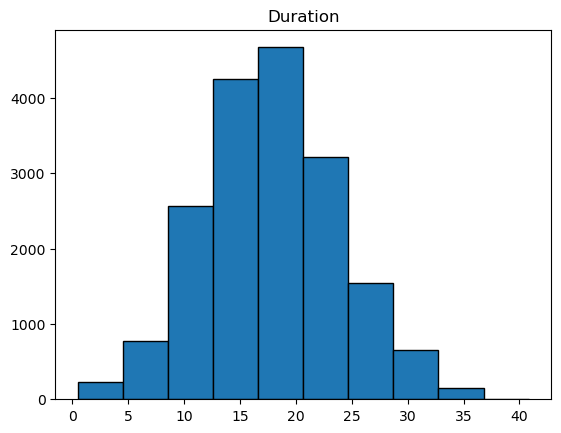

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [21]:
ride_data['duration'].hist(edgecolor="black",grid = False);
plt.title('Duration')
plt.show()
ride_data['duration'].describe()

Users rent scooters for an average of 13-22 minutes

These images can create a portrait of the average user.
This is a person from Pyatigorsk, without a subscription, aged 22 to 28 years, renting a scooter for 13-22 minutes to cover a distance of 2.5 - 3.7 km

# Data merging

Let's combine dataframes into one

In [22]:
data = users_data.merge(ride_data, on = 'user_id')
data = data.merge(sub_data, on = 'subscription_type')

Let's create 2 data farms based on the availability of a subscription

In [23]:
without_subscription = data.loc[data['subscription_type'] == 'free']
with_subscription = data.loc[data['subscription_type'] == 'ultra']

In [24]:
# Код ревьюера
display(data.shape[0])
display(without_subscription.shape[0])
with_subscription.shape[0]

18068

11568

6500

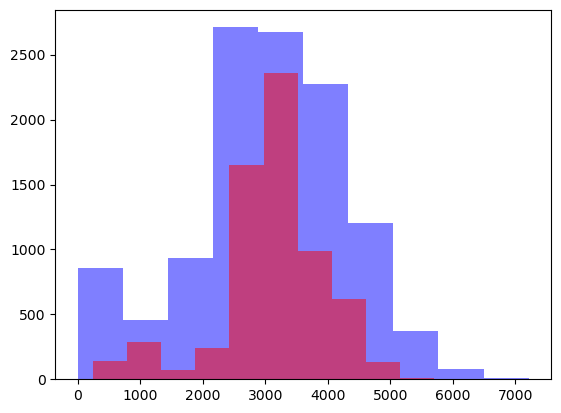

In [25]:
without_subscription['distance'].hist(color="b",grid = False,alpha = 0.5);
with_subscription['distance'].hist(color="r",grid = False,alpha = 0.5);

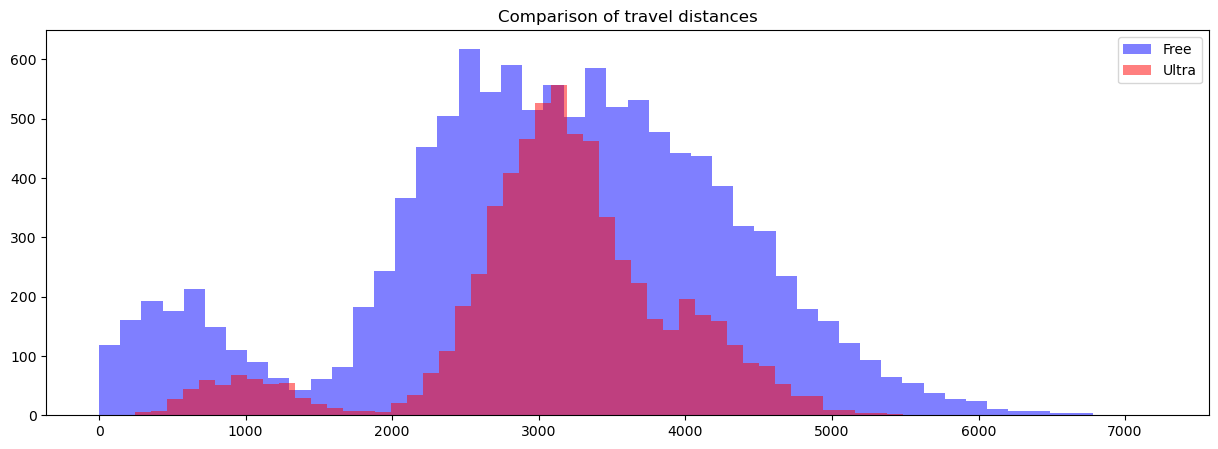

In [26]:
# Код ревьюера
plt.figure(figsize = (15, 5))
without_subscription['distance'].hist(color="b",grid = False,alpha = 0.5, bins = 50, label = 'Free')
with_subscription['distance'].hist(color="r",grid = False,alpha = 0.5, bins = 50, label = 'Ultra')
plt.title('Comparison of travel distances')
plt.legend()
plt.show()

Users without a subscription (blue) travel a greater distance.

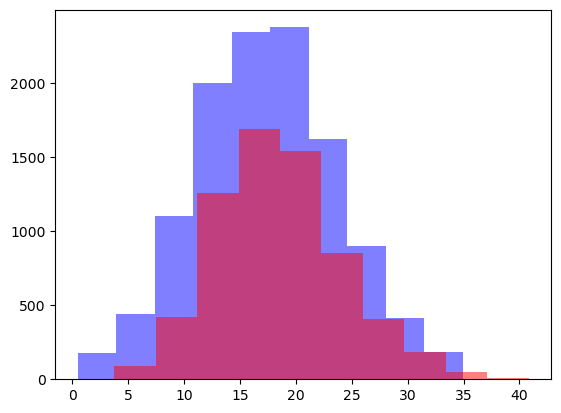

In [27]:
without_subscription['duration'].hist(color="b",grid = False,alpha = 0.5);
with_subscription['duration'].hist(color="r",grid = False,alpha = 0.5);

Users without a subscription (blue) rent scooters for longer periods of time

Non-subscription users rent scooters for longer periods of time and travel further distances

# Revenue calculation

Creating a dataframe with aggregated data

In [28]:
time_per_month = data.groupby(['user_id','month']).agg(n_rides=('user_id','count'))
duration_per_month = data.groupby(['user_id','month']).agg(duration_tot=('duration','sum'))
distance_per_month = data.groupby(['user_id','month']).agg(distance_tot=('distance','sum'))
stype = data.groupby(['user_id','month']).agg(subscription_type=('subscription_type','first'))
sfee = data.groupby(['user_id','month']).agg(subscription_fee=('subscription_fee','first'))
srp = data.groupby(['user_id','month']).agg(start_ride_price=('start_ride_price','first'))

In [29]:
df = (
    time_per_month.merge(duration_per_month, left_index=True, right_index=True, how='outer')
    .merge(distance_per_month, left_index=True, right_index=True, how='outer')
    .merge(stype,left_index=True, right_index=True, how='outer')
    .merge(sfee,left_index=True, right_index=True, how='outer')
    .merge(srp,left_index=True, right_index=True, how='outer')
    .reset_index()
    )

In [30]:
df

,user_id,month,n_rides,duration_tot,distance_tot,subscription_type,subscription_fee,start_ride_price
0,1,1,2,41.416640,7027.511294,ultra,199,0
1,1,4,1,6.232113,754.159807,ultra,199,0
2,1,8,2,44.776802,6723.470560,ultra,199,0
3,1,10,2,31.578017,5809.911100,ultra,199,0
4,1,11,3,53.397424,7003.499363,ultra,199,0
...,...,...,...,...,...,...,...,...
11326,1534,6,2,24.812678,3409.468534,free,0,50
11327,1534,8,2,47.205960,7622.453034,free,0,50
11328,1534,9,1,22.560373,4928.173852,free,0,50
11329,1534,11,4,76.342174,13350.015305,free,0,50


In [31]:
df['duration_tot'] = np.ceil(df['duration_tot'])

Add a column with monthly revenue

In [32]:
df['revenue'] = (df['start_ride_price']*df['n_rides'])+df['duration_tot']*data['minute_price']+data['subscription_fee']

In [33]:
df.sample(15)

,user_id,month,n_rides,duration_tot,distance_tot,subscription_type,subscription_fee,start_ride_price,revenue
2951,453,9,2,30.0,7232.309725,ultra,199,0,379.0
9681,1333,3,1,27.0,4720.637417,free,0,50,266.0
4233,651,7,3,38.0,6536.626436,ultra,199,0,427.0
6404,936,5,1,23.0,4279.966824,free,0,50,387.0
9480,1308,12,2,19.0,3970.355432,free,0,50,252.0
3526,540,12,2,43.0,7273.633026,ultra,199,0,457.0
2128,325,4,1,22.0,2983.526664,ultra,199,0,331.0
765,118,6,1,13.0,3103.226704,ultra,199,0,277.0
5943,879,5,1,28.0,4062.383081,free,0,50,417.0
8244,1159,5,1,18.0,3501.400005,free,0,50,194.0


In [34]:
# Код ревьюера
display(df.query('subscription_type == "free"').head(3))

df.groupby('subscription_type')['revenue'].mean()

,user_id,month,n_rides,duration_tot,distance_tot,subscription_type,subscription_fee,start_ride_price,revenue
4533,700,1,1,15.0,2515.690719,free,0,50,339.0
4534,700,2,5,86.0,13446.659764,free,0,50,965.0
4535,700,3,1,19.0,3798.334905,free,0,50,363.0


subscription_type
free     365.951015
ultra    361.481800
Name: revenue, dtype: float64

In [35]:
# Код ревьюера
df_sample_rev = df.query('subscription_type == "free"').head()
display(df_sample_rev)

df_sample_rev['revenue_rev'] = df_sample_rev['n_rides'] * df_sample_rev['start_ride_price'] \
                                                        + df_sample_rev['subscription_fee']\
                                                        + df_sample_rev['duration_tot'] * 8
print()
print("Датафрейм с моим столбцом расчета выручки")
display(df_sample_rev)

,user_id,month,n_rides,duration_tot,distance_tot,subscription_type,subscription_fee,start_ride_price,revenue
4533,700,1,1,15.0,2515.690719,free,0,50,339.0
4534,700,2,5,86.0,13446.659764,free,0,50,965.0
4535,700,3,1,19.0,3798.334905,free,0,50,363.0
4536,700,4,1,16.0,2984.551206,free,0,50,345.0
4537,700,6,2,29.0,5927.650988,free,0,50,473.0



Датафрейм с моим столбцом расчета выручки


,user_id,month,n_rides,duration_tot,distance_tot,subscription_type,subscription_fee,start_ride_price,revenue,revenue_rev
4533,700,1,1,15.0,2515.690719,free,0,50,339.0,170.0
4534,700,2,5,86.0,13446.659764,free,0,50,965.0,938.0
4535,700,3,1,19.0,3798.334905,free,0,50,363.0,202.0
4536,700,4,1,16.0,2984.551206,free,0,50,345.0,178.0
4537,700,6,2,29.0,5927.650988,free,0,50,473.0,332.0


# Hypothesis testing

## Subscribed users spend more time traveling

Null hypothesis (H0): Users with a subscription do not spend more time commuting than users without a subscription.

Alternative Hypothesis (H1): Users with a subscription spend more time commuting than users without a subscription.

A t-test for two independent samples can be used to test this hypothesis. To do this, you need to compare the duration of each session separately for subscribers and those who do not have a subscription. If the p-value is less than the significance level (usually 0.05), then we can reject the null hypothesis and accept the alternative hypothesis.

In [36]:
alpha = .05
results = st.ttest_ind(
    with_subscription['duration'], 
    without_subscription['duration'],
    alternative='greater')
if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

Rejecting the null hypothesis


There is a statistically significant difference between the two sample means, and users with a subscription do spend more time commuting than users without a subscription.

## The distance traveled by users with a subscription in one trip does not exceed 3130 meters

Null hypothesis (H0): The travel distance of scooter users does not exceed 3130 m.

Alternative hypothesis (H1): The travel distance of scooter users exceeds 3130 m.

A one-sample t-test can be used to test this hypothesis. To do this, we need to compare the distance of each trip separately with 3130 m. If the p-value is less than the significance level (usually 0.05) and the parameter alternative='greater', then we can reject the null hypothesis and accept the alternative hypothesis.

In [37]:
alpha = .05
results = st.ttest_1samp(with_subscription['distance'], 3130, alternative='greater')
if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

Failed to reject the null hypothesis


There is no statistically significant evidence that subscription scooter users ride distances greater than 3130 m.

## Whether the monthly revenue from users with a monthly subscription will be higher than the revenue from users without a subscription.

The null hypothesis (H0) is that the average monthly revenue from users with a subscription is equal to the average monthly revenue from users without a subscription.

The alternative hypothesis (H1) is that the average monthly revenue of users with a subscription is higher than that of users without a subscription.

In [38]:
alpha = .05
with_sub = df.loc[df['subscription_type'] == 'ultra']['revenue']
without_sub = df.loc[df['subscription_type'] == 'free']['revenue']
results = st.ttest_ind(with_sub, without_sub, alternative='greater')
if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

Failed to reject the null hypothesis


We cannot reject the null hypothesis. This means that the average monthly revenue from users with a subscription is no higher than that of users without a subscription.

# General conclusion
Work was carried out with data to find gaps, remove duplicates and change incorrect data types.
An exploratory data analysis with visualization was carried out according to the following criteria:
* City
* Availability of subscription
* Client's age
* Rental time
* Distance per rental

The data was combined into a new dataframe and the revenue for each client was calculated for the month. Also held
Hypotheses have been constructed from which the following conclusions can be drawn:
Revenue from users with a subscription is no more than without it. Users with a subscription on average do not cover a distance of 3130m on a scooter, which has a beneficial effect on the condition of the scooters, but there is no fundamental difference

#### Шаг 7. Распределения